In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Load data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Task Dibimbing/Portfolio/ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Observation:
1.  `Column `Unnamed: 0` needs to be removed, as it is unecessary columns.
2.  The names of each column are lowercase
3.  The values of the `experience_level`, `employment_type`, `remote_ratio`, and `company_size` columns need to be redefined.
4.  `work_year`, `salary`, `salary_in_usd`, and `remote_ratio` columns are numeric.

## **Data Cleansing**

In [4]:
# Drop unecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [5]:
# Checking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [6]:
# Checking and handling missing values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
# Checking duplicated data
df.duplicated().sum()

42

There are 42 duplicated rows; will be dropped later.

In [8]:
df[df.duplicated(keep=False)].sort_values('job_title').head(6)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
406,2022,MI,FT,Data Analyst,58000,USD,58000,US,0,US,S
393,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
392,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
527,2022,SE,FT,Data Analyst,135000,USD,135000,US,100,US,M
528,2022,SE,FT,Data Analyst,100000,USD,100000,US,100,US,M


In [9]:
# Drop duplicated rows
df = df.drop_duplicates()

In [10]:
# Sanity check
df.duplicated().sum()

0

In [11]:
# Reset Index
df = df.reset_index(drop=True)

Done. Duplicated rows have gone.

In [12]:
df.experience_level.value_counts()

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

In [13]:
df.employment_type.value_counts()

FT    546
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [14]:
df.remote_ratio.value_counts()

100    346
0      121
50      98
Name: remote_ratio, dtype: int64

In [15]:
df.company_size.value_counts()

M    290
L    193
S     82
Name: company_size, dtype: int64

In [16]:
# Renaming the column value

# Experience Level
df.experience_level.replace(['EN','MI','SE','EX'],['Entry-level','Mid-level','Senior-level', 'Expert-level'], inplace=True)

# Employment Type
df.employment_type.replace(['PT','CT','FT','FL'],['Part-time','Contract','Full-time', 'Freelance'], inplace=True)

# Remote Ratio
df.remote_ratio.replace([0,50,100],['Onsite','Hybrid','Remote'], inplace=True)

# Company Size
df.company_size.replace(['S','M','L'],['Small','Medium','Large'], inplace=True)

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,Onsite,DE,Large
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,Onsite,JP,Small
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,Onsite,HN,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large


In [17]:
# Recheck data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    object
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(3), object(8)
memory usage: 48.7+ KB


In [18]:
# Checking the number of unique values in each column

dict = {}
for col in df.columns:
    dict[col] = df[col].value_counts().shape[0]

pd.DataFrame(dict, index=['unique value count']).transpose()

,unique value count
work_year,3
experience_level,4
employment_type,4
job_title,50
salary,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3
company_location,50


In [19]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [20]:
df.describe()

,work_year,salary,salary_in_usd
count,565.000000,5.650000e+02,565.000000
mean,2021.364602,3.381160e+05,110610.343363
std,0.698138,1.599879e+06,72280.702792
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,6.700000e+04,60757.000000
50%,2021.000000,1.109250e+05,100000.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


Observations:
1. Dataframe has no missing values.  
2. After renaming the column value, the dtype of the `remote_ratio` column changes to object.
3. There are **42** duplicate rows, but have gone.



## **Exploratory Data Analysis**

### **Univariate Analysis**

In [21]:
# Separate columns into numerical and categorical
all_columns = df.columns.to_list()
numerical = ['work_year', 'salary', 'salary_in_usd']
categorical = list(set(all_columns) - set(numerical))

In [22]:
df[numerical]

,work_year,salary,salary_in_usd
0,2020,70000,79833
1,2020,260000,260000
2,2020,85000,109024
3,2020,20000,20000
4,2020,150000,150000
...,...,...,...
560,2022,154000,154000
561,2022,126000,126000
562,2022,129000,129000
563,2022,150000,150000


In [23]:
df[numerical].describe()

,work_year,salary,salary_in_usd
count,565.000000,5.650000e+02,565.000000
mean,2021.364602,3.381160e+05,110610.343363
std,0.698138,1.599879e+06,72280.702792
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,6.700000e+04,60757.000000
50%,2021.000000,1.109250e+05,100000.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


In [24]:
df[categorical].describe()

,experience_level,remote_ratio,employee_residence,company_location,job_title,company_size,salary_currency,employment_type
count,565,565,565,565,565,565,565,565
unique,4,3,57,50,50,3,17,4
top,Senior-level,Remote,US,US,Data Scientist,Medium,USD,Full-time
freq,243,346,295,318,130,290,359,546


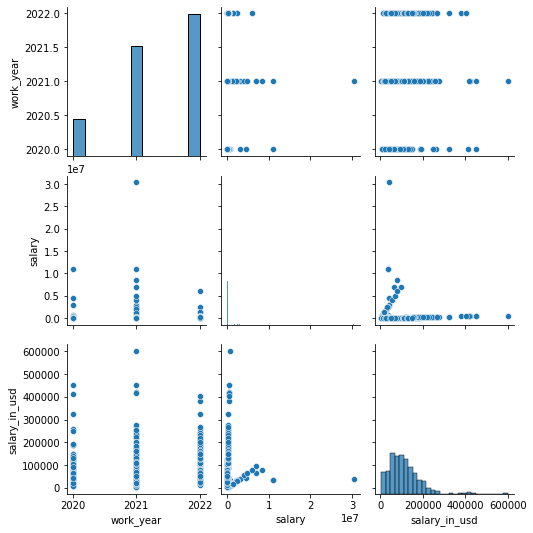

In [25]:
sns.pairplot(df)

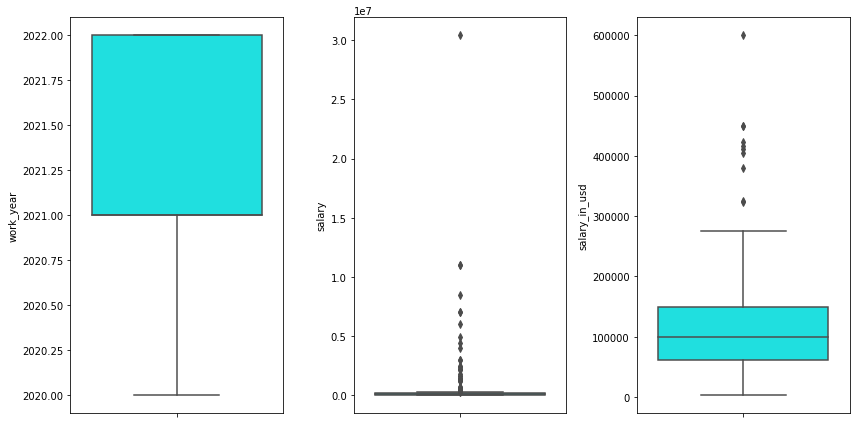

In [27]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

Observation:
1.   There is no outlier in `work_year` column.
2.   There are some outliers in the `salary` and `salary_in_usd` columns.



In [28]:
df[categorical]

,experience_level,remote_ratio,employee_residence,company_location,job_title,company_size,salary_currency,employment_type
0,Mid-level,Onsite,DE,DE,Data Scientist,Large,EUR,Full-time
1,Senior-level,Onsite,JP,JP,Machine Learning Scientist,Small,USD,Full-time
2,Senior-level,Hybrid,GB,GB,Big Data Engineer,Medium,GBP,Full-time
3,Mid-level,Onsite,HN,HN,Product Data Analyst,Small,USD,Full-time
4,Senior-level,Hybrid,US,US,Machine Learning Engineer,Large,USD,Full-time
...,...,...,...,...,...,...,...,...
560,Senior-level,Remote,US,US,Data Engineer,Medium,USD,Full-time
561,Senior-level,Remote,US,US,Data Engineer,Medium,USD,Full-time
562,Senior-level,Onsite,US,US,Data Analyst,Medium,USD,Full-time
563,Senior-level,Remote,US,US,Data Analyst,Medium,USD,Full-time


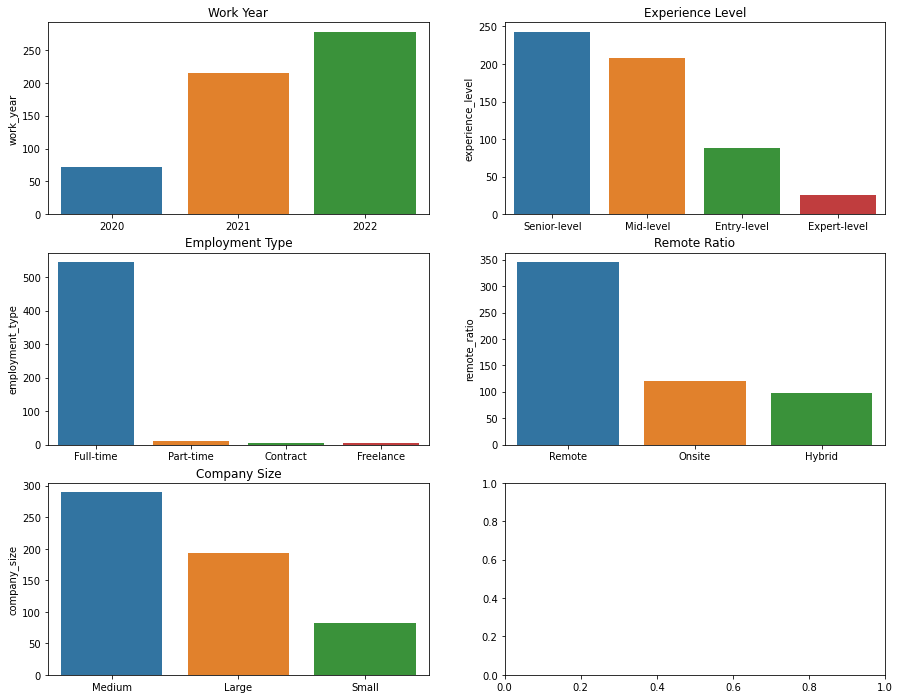

In [29]:
fig, axes = plt.subplots(3, 2, figsize = (15, 12))

sns.barplot(x = df["work_year"].value_counts().sort_values(ascending = False).index, y = df["work_year"].value_counts().sort_values(ascending = False), ax = axes[0][0])
axes[0][0].set_title("Work Year")

sns.barplot(x = df["experience_level"].value_counts().sort_values(ascending = False).index, y = df["experience_level"].value_counts().sort_values(ascending = False), ax = axes[0][1])
axes[0][1].set_title("Experience Level")

sns.barplot(x = df["employment_type"].value_counts().sort_values(ascending = False).index, y = df["employment_type"].value_counts().sort_values(ascending = False), ax = axes[1][0])
axes[1][0].set_title("Employment Type")

sns.barplot(x = df["remote_ratio"].value_counts().sort_values(ascending = False).index, y = df["remote_ratio"].value_counts().sort_values(ascending = False), ax = axes[1][1])
axes[1][1].set_title("Remote Ratio")

sns.barplot(x = df["company_size"].value_counts().sort_values(ascending = False).index, y = df["company_size"].value_counts().sort_values(ascending = False), ax = axes[2][0])
axes[2][0].set_title("Company Size");

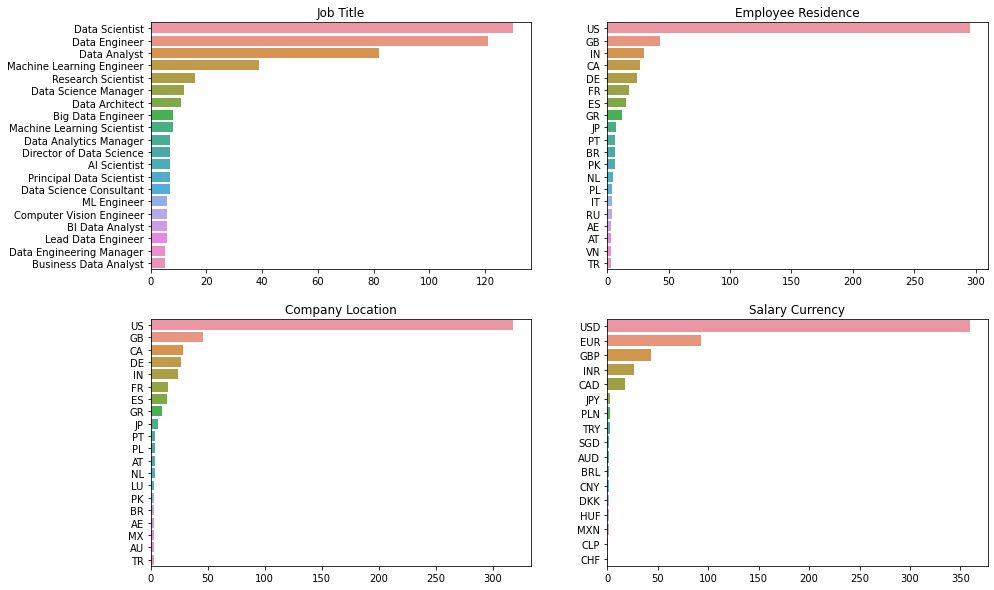

In [30]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.barplot(x = df["job_title"].value_counts().sort_values(ascending = False).head(20), 
            y = df["job_title"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[0][0])
axes[0][0].set_title("Job Title")
axes[0][0].set_xlabel("")

sns.barplot(x = df["employee_residence"].value_counts().sort_values(ascending = False).head(20), 
            y = df["employee_residence"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[0][1])
axes[0][1].set_title("Employee Residence")
axes[0][1].set_xlabel("")

sns.barplot(x = df["company_location"].value_counts().sort_values(ascending = False).head(20), 
            y = df["company_location"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[1][0])
axes[1][0].set_title("Company Location")
axes[1][0].set_xlabel("")

sns.barplot(x = df["salary_currency"].value_counts().sort_values(ascending = False).head(20), 
            y = df["salary_currency"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[1][1])
axes[1][1].set_title("Salary Currency")
axes[1][1].set_xlabel("");

# **Analysis: What is job with the highest salary in Data Science?**

Text(0.5, 1.0, 'Ranking of Salary(USD) by Job')

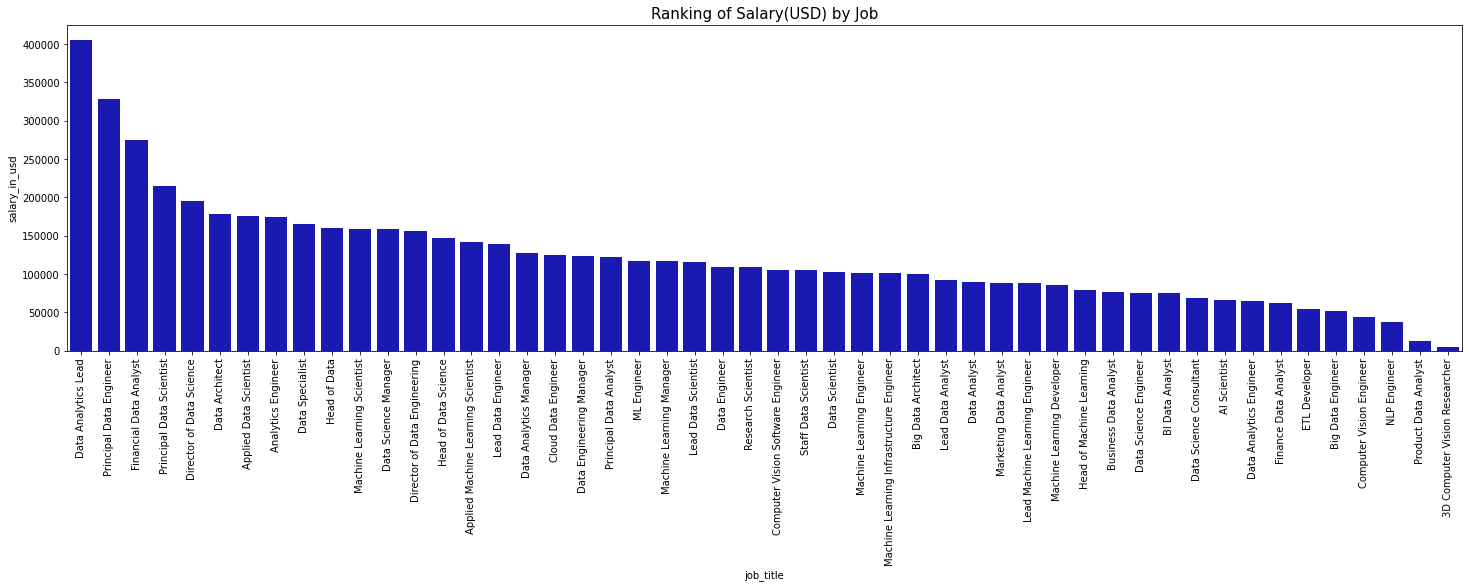

In [60]:
# Set the figure size
plt.figure(figsize = (25,6))

# plot a bar chart
sns.barplot(x = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending = False).index, 
            y = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending = False), color='mediumblue')
plt.xticks(rotation='vertical')
plt.title("Ranking of Salary(USD) by Job", fontsize = 15)

# **Analysis 1: What are the top 10 data science jobs in 2022?**

In [31]:
df.groupby(['work_year']).agg(
    job_title = ('job_title','count')
).reset_index()

,work_year,job_title
0,2020,72
1,2021,215
2,2022,278


In [33]:
df.salary.value_counts()

80000      18
100000     16
120000     15
60000      14
150000     14
           ..
39600       1
1335000     1
52500       1
31000       1
129000      1
Name: salary, Length: 272, dtype: int64

In [34]:
df22 = df[df["work_year"] == 2022]
df22.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
287,2022,Senior-level,Full-time,Data Engineer,135000,USD,135000,US,Remote,US,Medium
288,2022,Senior-level,Full-time,Data Analyst,155000,USD,155000,US,Remote,US,Medium
289,2022,Senior-level,Full-time,Data Analyst,120600,USD,120600,US,Remote,US,Medium
290,2022,Mid-level,Full-time,Data Scientist,130000,USD,130000,US,Onsite,US,Medium
291,2022,Mid-level,Full-time,Data Scientist,90000,USD,90000,US,Onsite,US,Medium


In [35]:
df22.job_title.value_counts().head(10)

Data Engineer                79
Data Scientist               65
Data Analyst                 58
Machine Learning Engineer    16
Data Architect                8
Data Science Manager          5
Analytics Engineer            4
Research Scientist            4
Data Analytics Manager        4
Applied Data Scientist        3
Name: job_title, dtype: int64

Text(0.5, 1.0, 'Top 10 Data Science Jobs in 2022')

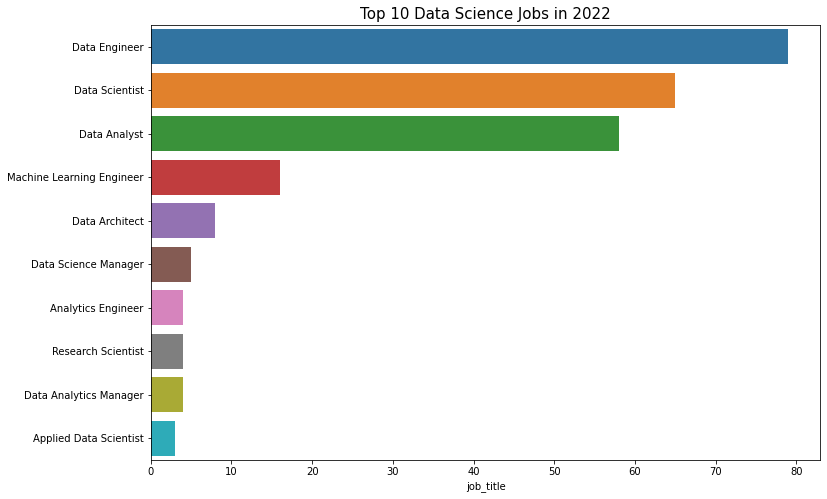

In [64]:
# Set the figure size
plt.figure(figsize = (12, 8))

# plot a bar chart
sns.barplot(x = df22["job_title"].value_counts().sort_values(ascending = False).head(10), 
            y = df22["job_title"].value_counts().sort_values(ascending = False).head(10).index)
plt.title('Top 10 Data Science Jobs in 2022', fontsize = 15)

Observations:

In 2022, the top 10 popular data science jobs are shown on the chart and the most popular is **Data Engineer**.


# **Analysis 2: How does the remote-ratio vary from year 2020 -2022?**

Text(0.5, 1.0, 'Variation of remote ratio from 2020-2022')

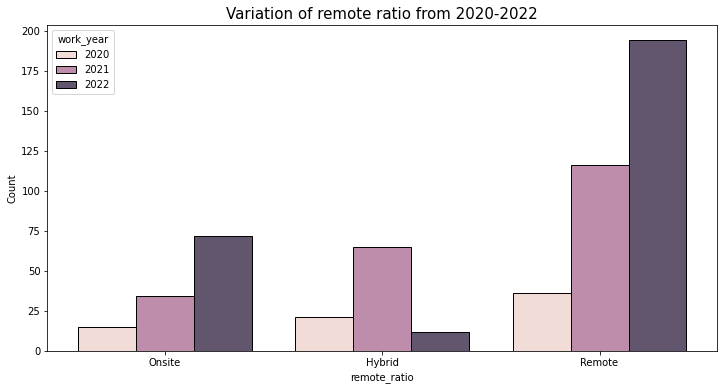

In [37]:
# Set the figure size
plt.figure(figsize = (12,6))

# plot a hist chart
sns.histplot(data = df, x = 'remote_ratio', hue = 'work_year', multiple = 'dodge', shrink = 0.8)
plt.title('Variation of remote ratio from 2020-2022', fontsize = 15)

Text(0.5, 1.0, 'Salary variation with exprience level')

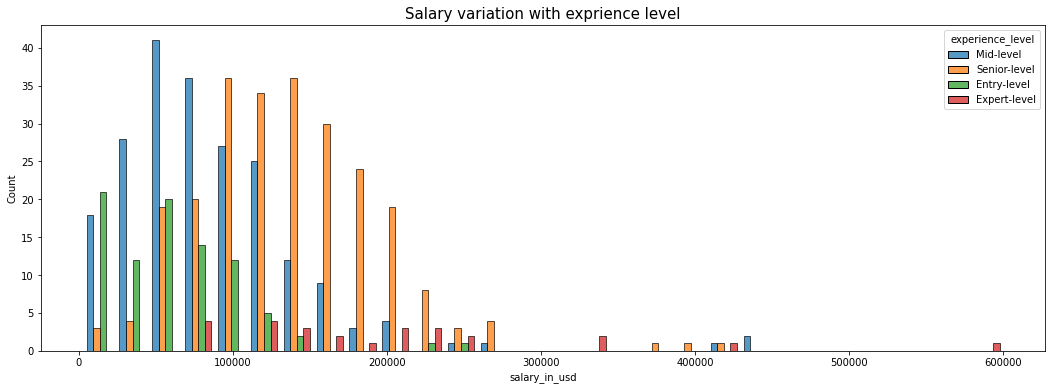

In [38]:
# Set the figure size
plt.figure(figsize = (18,6))

# plot a hist chart
sns.histplot(data = df, x = df.salary_in_usd, hue = 'experience_level', multiple = 'dodge', shrink = 0.8)
plt.title('Salary variation with exprience level', fontsize = 15)

Text(0.5, 1.0, 'Company Locations with Most Workers')

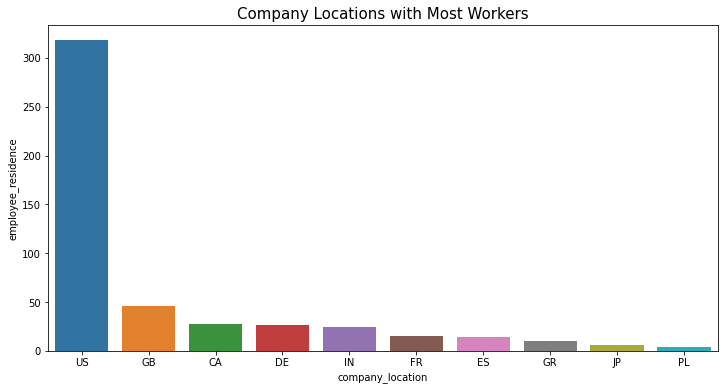

In [39]:
# Set the figure size
plt.figure(figsize = (12,6))

# plot a bar chart
sns.barplot(x = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10).index, 
            y = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10))
plt.title("Company Locations with Most Workers", fontsize = 15)

Text(0.5, 1.0, 'Job Title vs Salary in USD')

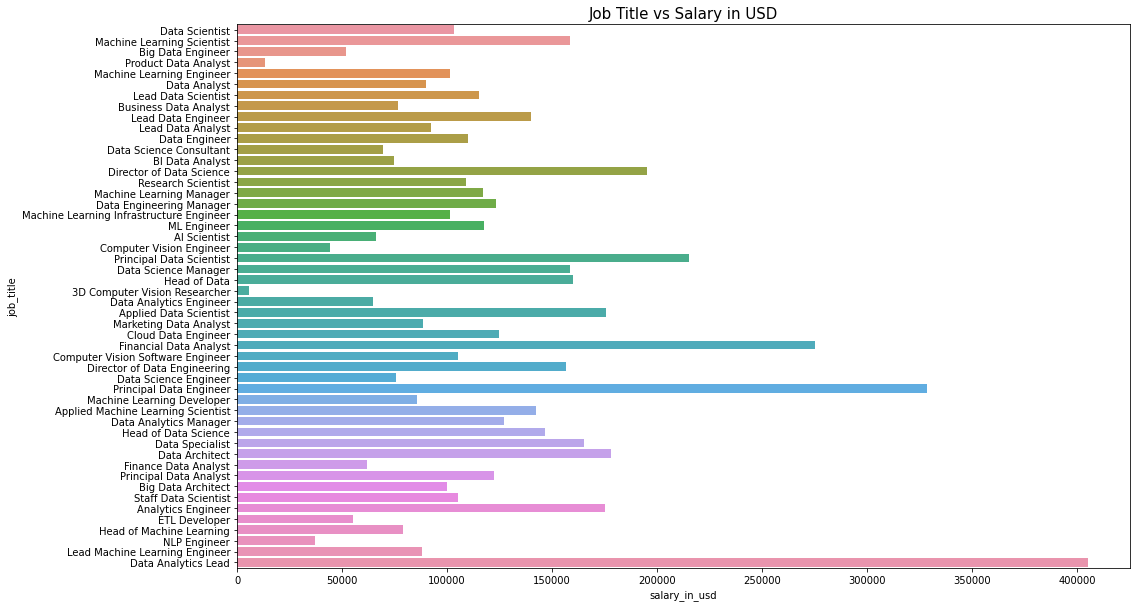

In [40]:
# Set the figure size
plt.figure(figsize=(16,10)) 

# plot a bar chart
sns.barplot(x = df['salary_in_usd'], y = df['job_title'], ci=None)
plt.xlabel = ('salary_in_usd')
plt.ylabel = ('job_title')
plt.title('Job Title vs Salary in USD', fontsize = 15)

Text(0.5, 1.0, 'Highest Salary Jobs')

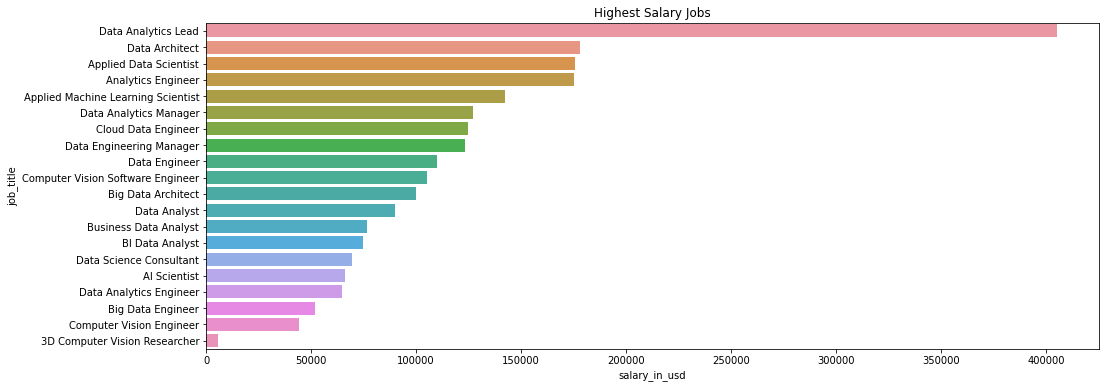

In [41]:
# Set the figure size
plt.figure(figsize = (16,6))

# plot a hist chart
sns.barplot(x = df.groupby("job_title")["salary_in_usd"].mean().head(20).sort_values(ascending = False), y = df.groupby("job_title")["salary_in_usd"].mean().head(20).sort_values(ascending = False).index)
plt.xlabel=("Salary in USD")
plt.ylabel=("")
plt.title("Highest Salary Jobs")

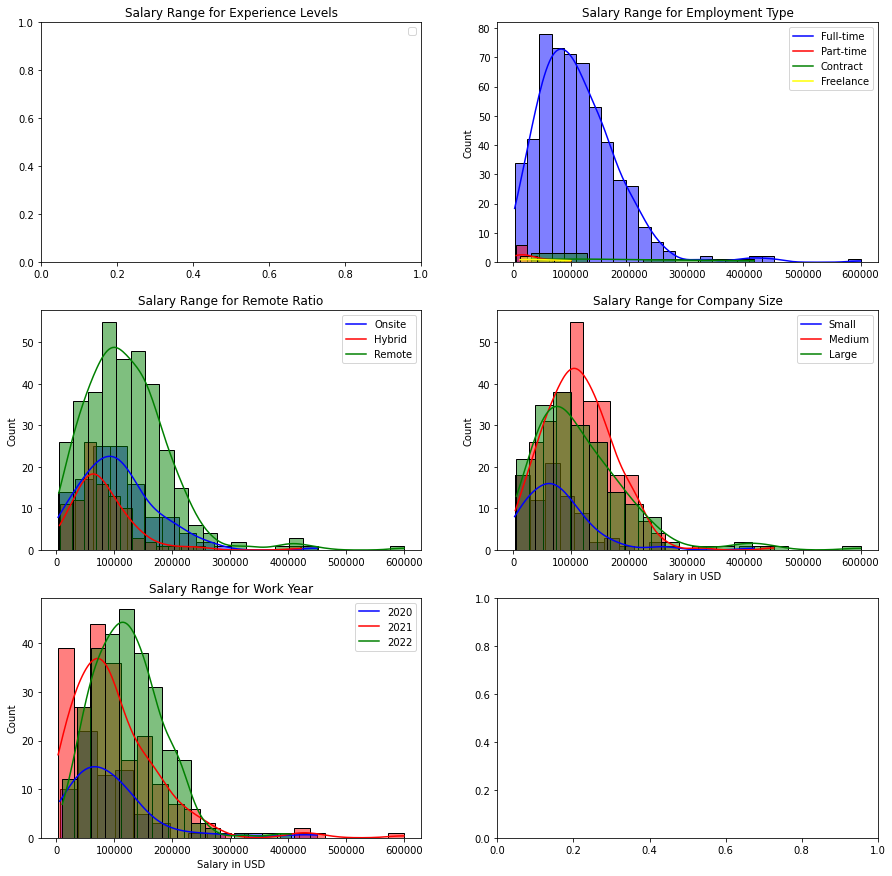

In [42]:
fig, axes = plt.subplots(3, 2, figsize = (15, 15))

sns.histplot(df.query("experience_level == 'Entry'")["salary_in_usd"], kde = True, color = "blue", ax = axes[0][0])
sns.histplot(df.query("experience_level == 'Junior'")["salary_in_usd"], kde = True, color = "red", ax = axes[0][0])
sns.histplot(df.query("experience_level == 'Senior'")["salary_in_usd"], kde = True, color = "green", ax = axes[0][0])
sns.histplot(df.query("experience_level == 'Expert'")["salary_in_usd"], kde = True, color = "yellow", ax = axes[0][0])
axes[0][0].legend(labels = ["Entry", "Junior", "Senior", "Expert"])
axes[0][0].set_xlabel("")
axes[0][0].set_title("Salary Range for Experience Levels")

sns.histplot(df.query("employment_type == 'Full-time'")["salary_in_usd"], kde = True, color = "blue", ax = axes[0][1])
sns.histplot(df.query("employment_type == 'Part-time'")["salary_in_usd"], kde = True, color = "red", ax = axes[0][1])
sns.histplot(df.query("employment_type == 'Contract'")["salary_in_usd"], kde = True, color = "green", ax = axes[0][1])
sns.histplot(df.query("employment_type == 'Freelance'")["salary_in_usd"], kde = True, color = "yellow", ax = axes[0][1])
axes[0][1].legend(labels = ["Full-time", "Part-time", "Contract", "Freelance"])
axes[0][1].set_xlabel("")
axes[0][1].set_title("Salary Range for Employment Type")

sns.histplot(df.query("remote_ratio == 'Onsite'")["salary_in_usd"], kde = True, color = "blue", ax = axes[1][0])
sns.histplot(df.query("remote_ratio == 'Hybrid'")["salary_in_usd"], kde = True, color = "red", ax = axes[1][0])
sns.histplot(df.query("remote_ratio == 'Remote'")["salary_in_usd"], kde = True, color = "green", ax = axes[1][0])
axes[1][0].legend(labels = ["Onsite", "Hybrid", "Remote"])
axes[1][0].set_xlabel("")
axes[1][0].set_title("Salary Range for Remote Ratio")

sns.histplot(df.query("company_size == 'Small'")["salary_in_usd"], kde = True, color = "blue", ax = axes[1][1])
sns.histplot(df.query("company_size == 'Medium'")["salary_in_usd"], kde = True, color = "red", ax = axes[1][1])
sns.histplot(df.query("company_size == 'Large'")["salary_in_usd"], kde = True, color = "green", ax = axes[1][1])
axes[1][1].legend(labels = ["Small", "Medium", "Large"])
axes[1][1].set_xlabel("Salary in USD")
axes[1][1].set_title("Salary Range for Company Size")

sns.histplot(df.query("work_year == 2020")["salary_in_usd"], kde = True, color = "blue", ax = axes[2][0])
sns.histplot(df.query("work_year == 2021")["salary_in_usd"], kde = True, color = "red", ax = axes[2][0])
sns.histplot(df.query("work_year == 2022")["salary_in_usd"], kde = True, color = "green", ax = axes[2][0])
axes[2][0].legend(labels = ["2020", "2021", "2022"])
axes[2][0].set_xlabel("Salary in USD")
axes[2][0].set_title("Salary Range for Work Year");

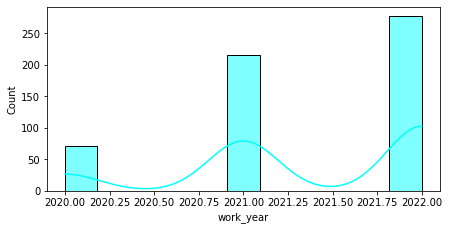

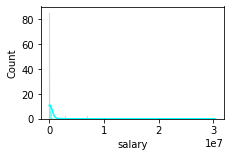

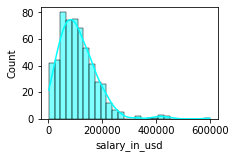

In [43]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color='cyan', kde=True)
    # plt.xlabel(features[i])
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: ignored

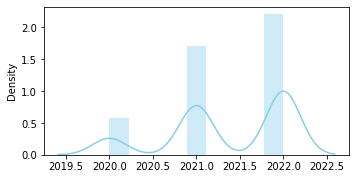

In [44]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(16,6))

sns.histplot(df.query("work_year == 2020")["salary_in_usd"], kde = True, color = "blue", ax = axes[2][0])
sns.histplot(df.query("work_year == 2021")["salary_in_usd"], kde = True, color = "red", ax = axes[2][0])
sns.histplot(df.query("work_year == 2022")["salary_in_usd"], kde = True, color = "green", ax = axes[2][0])
axes[2][0].legend(labels = ["2020", "2021", "2022"])
axes[2][0].set_xlabel("Salary in USD")
axes[2][0].set_title("Salary Range for Work Year");

# plt.figure(figsize=(16,6))
# sns.histplot(data=df,x='remote_ratio',hue='work_year',multiple='dodge',shrink=0.8)

In [ ]:
df

In [ ]:
df[categorical].describe()

In [ ]:
# check if change string value to integer

check_df = df.replace({'Part-time':1,'Contract':2,'Full-time':3, 'Freelance':4, 'Entry-level':1,'Mid-level':2,'Senior-level':3, 'Expert-level':4, 'Onsite':1,'Hybrid':2,'Remote':3, 'Small':1,'Medium':2,'Large':3}, regex=True)

check_df.info()

In [ ]:
# correlation heatmap df
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [ ]:
# correlation heatmap check_df
plt.figure(figsize=(15,8))

correlation2 = check_df.corr()
sns.heatmap(correlation2, annot=True, fmt='.2f')
plt.show()

In [ ]:
# Renaming the column value

# Experience Level
df.experience_level.replace(['EN','MI','SE','EX'],['Entry-level','Mid-level','Senior-level', 'Expert-level'], inplace=True)

# Employment Type
df.employment_type.replace(['PT','CT','FT','FL'],['Part-time','Contract','Full-time', 'Freelance'], inplace=True)

# Remote Ratio
df.remote_ratio.replace([0,50,100],['Onsite','Hybrid','Remote'], inplace=True)

# Company Size
df.company_size.replace(['S','M','L'],['Small','Medium','Large'], inplace=True)

df.head()

### **Multivariate Analysis**